In [2]:
!pip install txtai[all] sacremoses torchvision ipyplot > /dev/null

Workflows are a simple yet powerful construct that takes a callable and returns elements. Workflows operate well with pipelines but can work with any callable object. Workflows are streaming and work on data in batches, allowing large volumes of data to be processed efficiently.

Workflows combine machine-learning pipelines together to aggregate logic. This application provides a number of pre-configured workflows to get a feel of how they work. Workflows can be exported and run locally through FastAPI. Read more on GitHub and in the Docs.

In [6]:
from txtai.pipeline import Summary, Textractor, Transcription, Translation
from txtai.workflow import FileTask, Task, Workflow, ImageTask, RetrieveTask, ServiceTask

In [ ]:
mult_2 = lambda x: [y * 2 for y in x]

In [ ]:
workflow = Workflow([Task(mult_2)])
list(workflow([1, 2, 3]))

[2, 4, 6]

In [ ]:
summary = Summary()
new_task = Task(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
workflow = Workflow([new_task])

list(workflow(["Very long text here"]))

['Very long text here']

In [ ]:
workflow = Workflow([Task([lambda x: [y * 3 for y in x], 
                           lambda x: [y - 1 for y in x]],
                           unpack=False, column={0:0, 1:1})])
list(workflow([(2, 8),(4, 18)]))

[(6, 7), (12, 17)]

In [ ]:
workflow = Workflow([Task([lambda x: [y * 3 for y in x], 
                           lambda x: [y - 1 for y in x]],
                           unpack=True, column={0:0, 1:1})])
list(workflow([(2, 8),(4, 18)]))

[(2, (24, 7)), (4, (54, 17))]

The Console Task prints task inputs and outputs to standard output. This task is mainly used for debugging and can be added at any point in a workflow.

In [ ]:
from txtai.workflow import ConsoleTask

workflow = Workflow([ConsoleTask()])
workflow(["Input 1", "Input2"])

<generator object Workflow.__call__ at 0x7fb02c5f02e0>

The File Task validates a file exists. It handles both file paths and local file urls. Note that this task only works with local files.



In [15]:
workflow = Workflow([FileTask()])
workflow("/content/*.pdf")

<generator object Workflow.__call__ at 0x7f50b034ddd0>

In [ ]:
for x in workflow("/content/*.pdf"):
  print(x)

The Image Task reads file paths, check the file is an image and opens it as an Image object. Note that this task only works with local files.

In [11]:
workflow = Workflow([ImageTask()])
workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/kaggle-gray.svg"])

<generator object Workflow.__call__ at 0x7f50b034dcf0>

In [14]:
for pic in workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/kaggle-gray.svg"]):
  print(pic)

https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/kaggle-gray.svg


The Retrieve Task connects to a url and downloads the content locally. This task is helpful when working with actions that require data to be available locally.

In [7]:
workflow = Workflow([RetrieveTask(directory="/content/")])
workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/Setup_xrdp_Manjaro%20Linux.pdf", 
          "https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/christmas-141964.mp4"])

<generator object Workflow.__call__ at 0x7f50b04cc270>

In [8]:
for x in workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/Setup_xrdp_Manjaro%20Linux.pdf", 
          "https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/christmas-141964.mp4"]):
  print(x)

/content/Setup_xrdp_Manjaro%20Linux.pdf
/content/christmas-141964.mp4


The Service Task extracts content from a http service.

In [9]:
from txtai.workflow import ServiceTask, Workflow

workflow = Workflow([ServiceTask(url="https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/Setup_xrdp_Manjaro%20Linux.pdf")])

In [ ]:
for z in workflow(["parameter"]):
  print(z)

The Storage Task expands a local directory or cloud storage bucket into a list of URLs to process.

In [17]:
from txtai.workflow import StorageTask, Workflow

store_flow = Workflow([StorageTask()])
for x in store_flow("/content"):
  print(x)

/
c
o
n
t
e
n
t


The Template Task generates text from a template and task inputs. Templates can be used to prepare data for a number of tasks including generating large language model (LLM) prompts.

In [ ]:
from txtai.workflow import TemplateTask, Workflow

workflow = Workflow([TemplateTask(template="This is a {text} task")])
workflow([{"text": "template"}])

The Url Task validates that inputs start with a url prefix.



In [ ]:
from txtai.workflow import UrlTask, Workflow

workflow = Workflow([UrlTask()]) 

workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/code_script_notebooks/projects/txtai_exploration/workflow_txtai.ipynb"])

<generator object Workflow.__call__ at 0x7fccbe9ae3c0>

In [ ]:
for a in workflow(["https://github.com/insightbuilder/python_de_learners_data/blob/main/code_script_notebooks/projects/txtai_exploration/workflow_txtai.ipynb"]):
  print(a)

github/insightbuilder/python_de_learners_data/blob/main/code_script_notebooks/projects/txtai_exploration/workflow_txtai.ipynb


The Workflow Task runs a workflow. Allows creating workflows of workflows.

In [ ]:
from txtai.workflow import WorkflowTask, Workflow

workflow = Workflow([WorkflowTask(store_flow)])
for x in workflow("/content"):
  print(x)

In [22]:
textract = Textractor()
transcribe = Transcription("facebook/wav2vec2-large-960h")
translate = Translation()
summary = Summary()

In [54]:
article = Workflow([
    Task(textract),
    Task(summary),
    Task(translate,'de')
])

In [46]:
import glob

data = glob.glob("/content/*.pdf")
data

['/content/react_framework.pdf',
 '/content/self-ask.pdf',
 '/content/Setup_xrdp_Manjaro%20Linux.pdf']

In [55]:
data_out = article(data)

In [56]:
list_data = list(data_out)

In [57]:
list_data

['The ReadME Project GitHub community articles and community articles are curated by GitHub. Use this article to help you understand more about the community. Use the GitHub tool to test your knowledge of the latest developments in the open-source software. Use the latest version of the weekly Open Source Update to make the most recent update to the latest update to this article.',
 'We measure how often models can correctly answer all sub-problems but not generate the overall solution. We evaluate this ratio by asking multi-hop questions with answers that re- quire composing multiple facts unlikely to have been observed together during pretraining. The compositionality gap remains at a roughly constant 40% between different model sizes and training techniques, with no apparent improvement from scale.',
 'Git commands accept both tag and branch names, so creating this branch may cause unexpected behavior. This commit does not belong to any branch on this repository, and may belong to a

In [62]:
textractor = Textractor(paragraphs=True)

In [ ]:
!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

In [ ]:
!wget -N https://github.com/insightbuilder/python_de_learners_data/blob/main/resources/react_framework.pdf

In [63]:
self_ask_para = textractor("self-ask.pdf")

In [ ]:
self_ask_para

In [ ]:
!pip install 

In [ ]:
translate_de = translate(self_ask_para[1],"de")

In [71]:
translate_de

'Opir Press1,2, Muru Zhang1, Sewon Min1,3, Ludwig Schmidt1,4, Noah A. Smith1,4, Mike Lewis3'

In [77]:
self_ask_para[6]

'Compositional reasoning lets models go beyond rote memorization of directly observed facts to deduce previously unseen knowledge. For example, a model should be able to answer “How long was Queen Elizabeth’s reign?” even if the answer did not explicitly appear in the training data, by recalling her coronation and death dates and reasoning over these facts. While language models (LMs) have shown strong question answering performance, it remains unclear how much is due to memorization of huge corpora vs how much is due to reasoning.'

In [78]:
languages = ["fr", "es", "de", "hi", "ja"]

translations = [translate(self_ask_para[6], 
                          language) for language in languages]

for x, text in enumerate(translations):
  print("Translated Language: %s" % languages[x])
  print("Translation: %s" % text)
  print("Original English: %s" % self_ask_para[6])
  print()

Translated Language: fr
Translation: Le raisonnement de composition permet aux modèles d'aller au-delà de la mémorisation rotée des faits directement observés pour déduire des connaissances auparavant invisibles. Par exemple, un modèle devrait être en mesure de répondre à la question de savoir combien de temps la reine Elizabeth a-t-il été le règne?, même si la réponse n'apparaît pas explicitement dans les données d'entraînement, en rappelant ses dates de couronnement et de mort et son raisonnement sur ces faits.
Original English: Compositional reasoning lets models go beyond rote memorization of directly observed facts to deduce previously unseen knowledge. For example, a model should be able to answer “How long was Queen Elizabeth’s reign?” even if the answer did not explicitly appear in the training data, by recalling her coronation and death dates and reasoning over these facts. While language models (LMs) have shown strong question answering performance, it remains unclear how muc

In [ ]:
translate_sql = Translation("NeuML/t5-small-txtsql", findmodels=False)

translate_sql("translate English to SQL: self ask search concept", None)

In [ ]:
# Get test data
!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

CLIP (Contrastive Language-Image Pre-Training) is a neural network trained on a variety of (image, text) pairs.

In [5]:
%%capture

import glob

from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

In [6]:
caption = Caption()
info = []

for path in glob.glob('txtai/*jpg'):
  # Add image object along with image metadata
  image = Image.open(path)
  info.append((path,{"object": image, 
                    "format": image.format, 
                    "width": image.width, 
                    "height": image.height, 
                    "caption": caption(image)
                    }, 
              None))

/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [7]:
# Index with content and objects
embeddings = Embeddings({"method": "sentence-transformers", 
                         "path": "sentence-transformers/clip-ViT-B-32", "content": True, "objects": "image"})
embeddings.index(info)

In [10]:
images, labels = [], []
for query in ["Walking into the office", "Saturday cleaning the yard", "Working on the latest analysis", "Working on my homework", "Watching an exciting race",
              "The universe is massive", "Time lapse video of traffic", "Relaxing Thanksgiving day"]:
  result = embeddings.search(f"select object from txtai where similar(\"{query}\")", 1)[0]
  images.append(result["object"])
  labels.append(query)

In [11]:
import ipyplot

result = embeddings.search("select object from txtai where similar('Time lapse Traffic')")


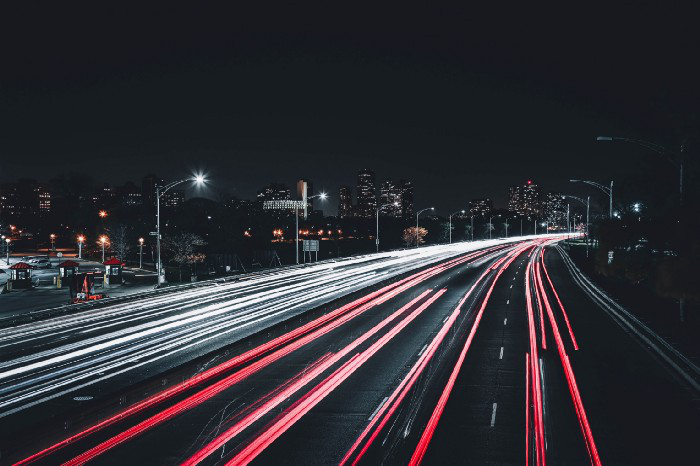
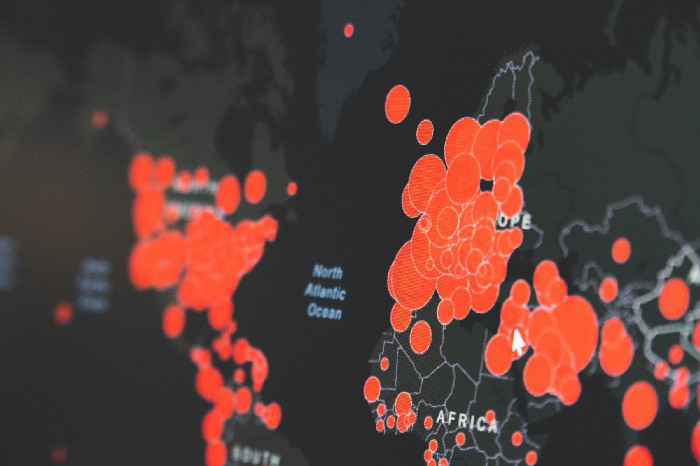

In [ ]:
ipyplot.plot_images([result[0]['object'],
                     result[1]['object']], ["Timelapse traffic",
                                            "Other traffic related pic"], 
                    img_width=425, 
                    force_b64=True)

In [13]:
%%capture
# Get CORD-19 metadata file
!wget https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2021-11-01/metadata.csv
!head -1 metadata.csv > input.csv
!tail -10000 metadata.csv >> input.csv
     